In [ ]:
from merfish3danalysis.qi2labDataStore import qi2labDataStore
from merfish3danalysis.PixelDecoder import PixelDecoder
from pathlib import Path
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np
from numpy.typing import ArrayLike
import json
import seaborn as sns
import ast 

/home/hugob/miniforge3/envs/merfish3d/lib/python3.12/site-packages/pycudadecon/_libwrap.py:44: UserWarning: Unable to find function: camcor_interface_init in libcudaDecon
  @lib.function
/home/hugob/miniforge3/envs/merfish3d/lib/python3.12/site-packages/pycudadecon/_libwrap.py:51: UserWarning: Unable to find function: camcor_interface in libcudaDecon
  @lib.function


In [3]:
res_path = Path(r"/mnt/d/EQUIPEX/Data/2025012025_statphysbio_simulation/fixed/sim_acquisition/decode_params_results.json")
with open(res_path, 'r') as f:
    decode_results = json.load(f)

In [ ]:
def decode_results_to_dataframe(decode_results: dict) -> pd.DataFrame:
    """
    Convert decode_results dictionary into a Pandas DataFrame.

    Parameters
    ----------
    decode_results : dict
        The dictionary containing decode results.

    Returns
    -------
    pd.DataFrame
        A DataFrame representation of the decode results.
    """
    # Flatten the dictionary into a list of records
    records = []
    for key, value in decode_results.items():
        # If the value is a dictionary, include its keys as columns
        record = {**ast.literal_eval(key), **value}
        records.append(record)
    
    # Convert the list of records into a DataFrame
    return pd.DataFrame(records)

df = decode_results_to_dataframe(decode_results)

In [47]:
df

fdr  min_pixels  ufish_threshold  F1 Score  Precision    Recall  \
0    0.05           2             0.10  0.321928   0.621622  0.217209   
1    0.05           2             0.15  0.375940   0.663130  0.262329   
2    0.05           2             0.20  0.371642   0.643411  0.261280   
3    0.05           2             0.25  0.321575   0.736842  0.205666   
4    0.05           2             0.30  0.245366   0.772222  0.145855   
..    ...         ...              ...       ...        ...       ...   
135  0.25           5             0.20  0.483092   0.705645  0.367261   
136  0.25           5             0.25  0.490358   0.713427  0.373557   
137  0.25           5             0.30  0.497614   0.710117  0.383001   
138  0.25           5             0.35  0.509831   0.720307  0.394544   
139  0.25           5             0.40  0.521505   0.725234  0.407135   

     True Positives  False Positives  False Negatives  
0               207              126              746  
1               250              127              703  
2               249              138              704  
3               196               70              757  
4               139               41              814  
..              ...              ...              ...  
135             350              146              603  
136             356              143              597  
137             365              149              588  
138             376              146              577  
139             388              147              565  

[140 rows x 9 columns]

array([0.05, 0.1 , 0.15, 0.2 , 0.25])

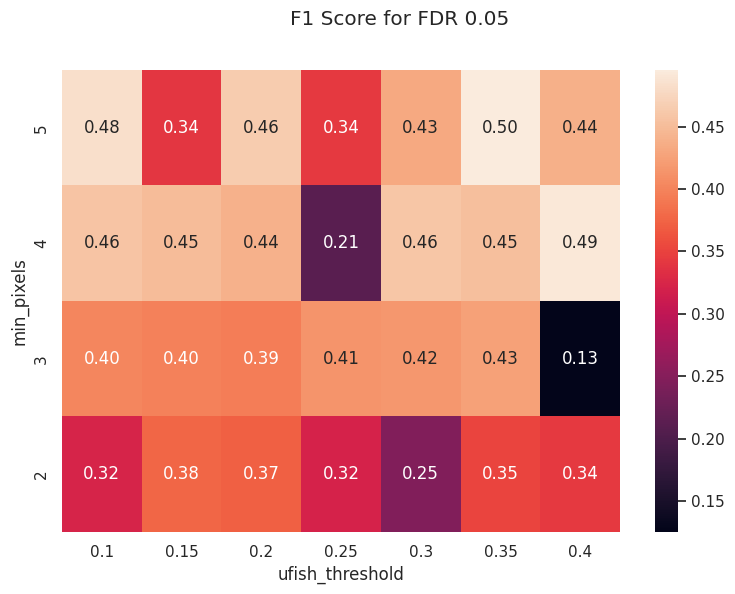

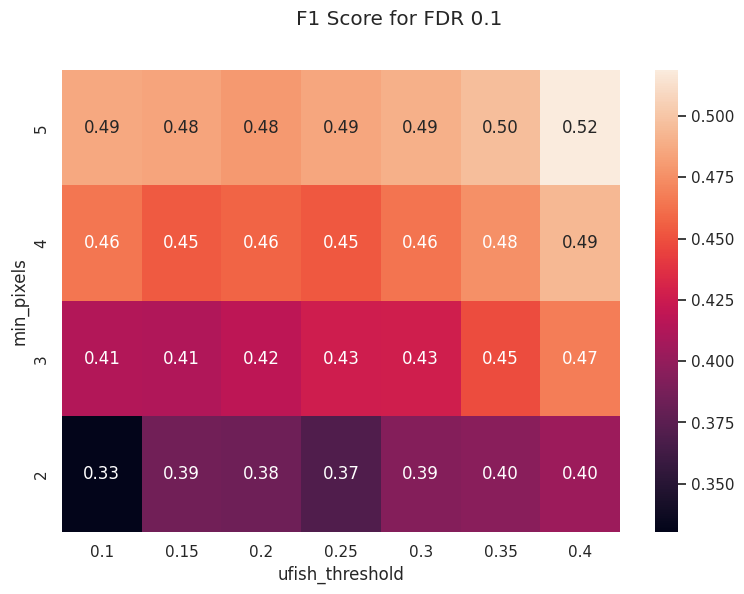

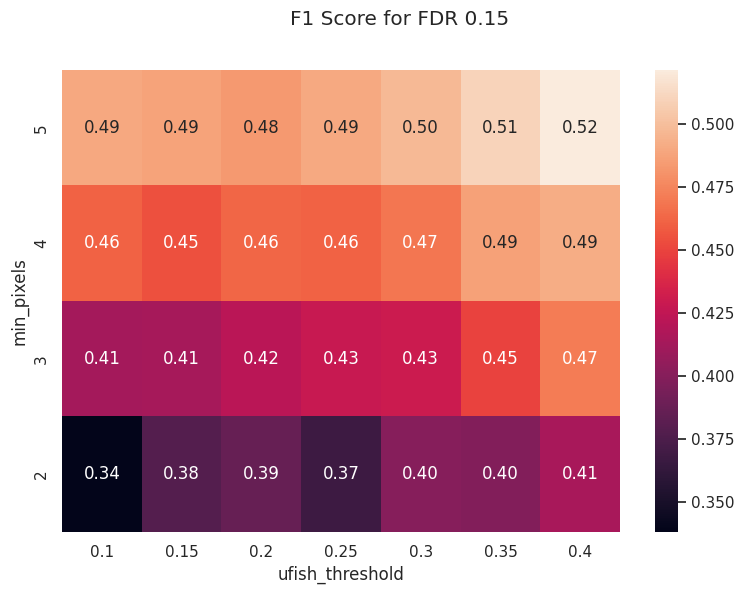

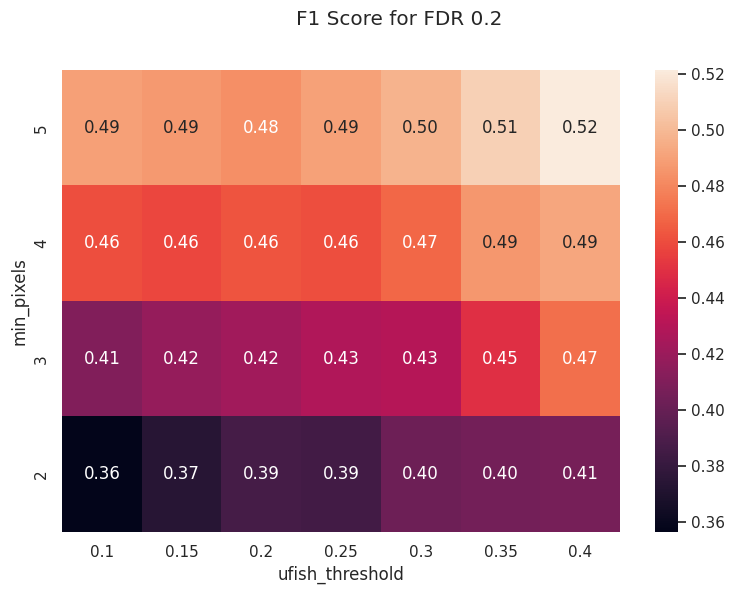

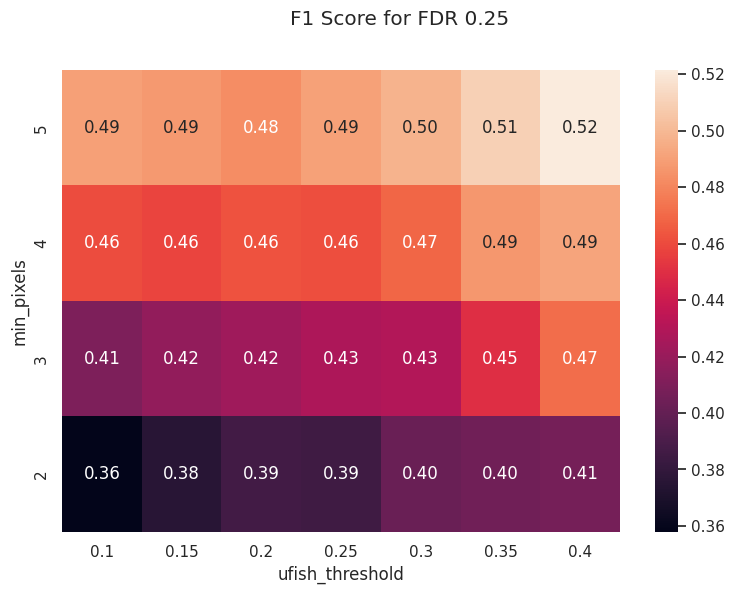

In [51]:
df_heatmap

ufish_threshold      0.10      0.15      0.20      0.25      0.30      0.35  \
min_pixels                                                                    
2                0.321928  0.375940  0.371642  0.321575  0.245366  0.352211   
3                0.401487  0.397563  0.394817  0.414414  0.416479  0.425940   
4                0.457478  0.450331  0.439315  0.211932  0.458824  0.452663   
5                0.483392  0.339806  0.463789  0.342585  0.432473  0.495426   

ufish_threshold      0.40  
min_pixels                 
2                0.343320  
3                0.125237  
4                0.491935  
5                0.438066